<a href="https://colab.research.google.com/github/LsHFYKR/tibame00922/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
# mnist(60000, ): [3, 1, 4, 5]
# cifar10(50000, 1): [[3], [1], [4], [5]]
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
trans = [    
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck",
]

horse


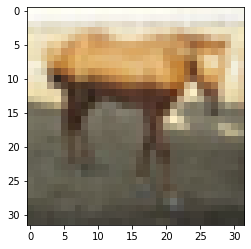

In [ ]:
import matplotlib.pyplot as plt
idx = 2000
print(trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
layers = [
    # 一個filter: 3(kh) * 3(kw) * 3(last channel) + 1(bias) = 28. 
    # 28 * 64 = 1792 
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    # 一個filter: 3 * 3 * 64 + 1(bias) = 577
    # 128 * 577 = 73856
    MaxPooling2D(),
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),   
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [ ]:
# y: 做one-hot encoding很耗費ram, 直接使用Sparse省RAM又方便
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
x_train_norm = x_train /255.0
x_test_norm = x_test /255.0

In [ ]:
# batch_size: 看多少筆資料調整一次梯度(10-200)
# = 200: 54000(訓練資料) / 200 -> 270(次)梯度調整
# epochs: 54000筆看幾次
# = 10: 270 * 10 (次) 梯度調整
# validation_split: 0.1
# verbose: 1(進度條) 0(啥都沒) 2(不會有進度條)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cifar10.h5", save_best_only=True)
]
model.fit(x_train_norm,
          y_train,
          batch_size=200,
          epochs=100,
          validation_split=0.1,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
225/225 - 316s - loss: 1.7297 - accuracy: 0.3696 - val_loss: 1.3235 - val_accuracy: 0.5190
Epoch 2/100
225/225 - 309s - loss: 1.2961 - accuracy: 0.5355 - val_loss: 1.0768 - val_accuracy: 0.6206
Epoch 3/100
225/225 - 309s - loss: 1.0973 - accuracy: 0.6114 - val_loss: 0.9509 - val_accuracy: 0.6656
Epoch 4/100
225/225 - 311s - loss: 0.9681 - accuracy: 0.6594 - val_loss: 0.8472 - val_accuracy: 0.7078
Epoch 5/100
225/225 - 309s - loss: 0.8685 - accuracy: 0.6964 - val_loss: 0.8213 - val_accuracy: 0.7190
Epoch 6/100
225/225 - 311s - loss: 0.7916 - accuracy: 0.7237 - val_loss: 0.7722 - val_accuracy: 0.7372
Epoch 7/100
225/225 - 308s - loss: 0.7257 - accuracy: 0.7446 - val_loss: 0.7394 - val_accuracy: 0.7504
Epoch 8/100
225/225 - 308s - loss: 0.6598 - accuracy: 0.7711 - val_loss: 0.7263 - val_accuracy: 0.7518
Epoch 9/100
225/225 - 308s - loss: 0.6067 - accuracy: 0.7875 - val_loss: 0.6866 - val_accuracy: 0.7672
Epoch 10/100
225/225 - 308s - loss: 0.5587 - accuracy: 0.8046 - val_loss:

In [ ]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.7045 - accuracy: 0.7646


[0.7045468688011169, 0.7645999789237976]

In [ ]:


proba = model.predict(x_test_norm)
pre = proba.argmax(axis=1)
print(pre.shape)
print(y_test.shape)
y_test_1d = y_test.reshape(10000)
print(y_test_1d.shape)



(10000,)
(10000, 1)
(10000,)


In [ ]:


import pandas as pd
from sklearn.metrics import confusion_matrix
# tf: predict -> sklearn: predict_proba
# axis: 0(縱) 1(橫)
mat = confusion_matrix(y_test_1d, pre)
pd.DataFrame(mat,
             index=["{}(正確)".format(trans[i]) for i in range(10)],
             columns=["{}(預測)".format(trans[i]) for i in range(10)])



,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(正確),841,14,20,12,16,4,3,13,29,48
automobile(正確),18,844,2,6,1,2,3,3,14,107
bird(正確),71,6,622,39,87,56,41,44,16,18
cat(正確),26,10,52,526,72,186,33,51,20,24
deer(正確),18,4,41,43,743,27,25,87,8,4
dog(正確),10,6,29,118,45,696,7,66,13,10
frog(正確),7,5,41,54,44,25,781,16,11,16
horse(正確),16,2,19,16,45,37,1,851,2,11
ship(正確),53,24,6,9,3,5,1,3,865,31
truck(正確),23,51,5,4,2,3,5,12,18,877


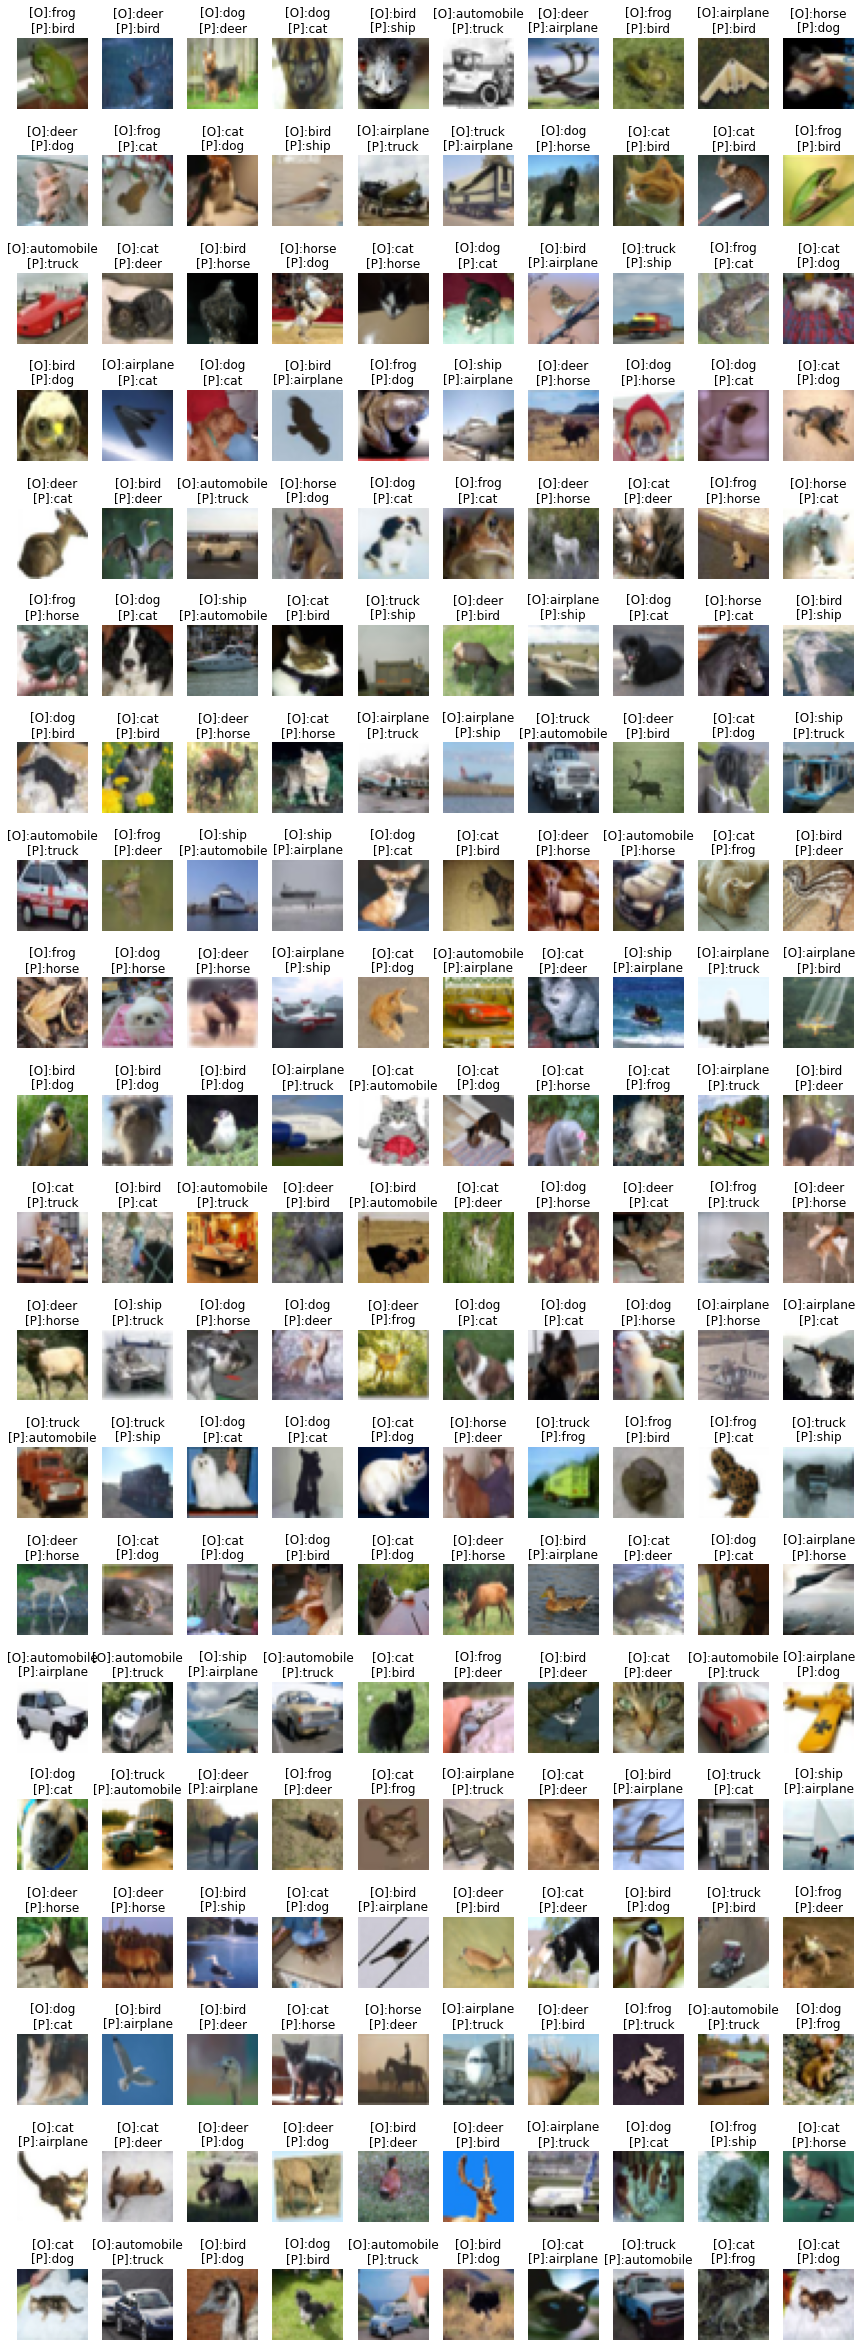

In [ ]:
import numpy as np
idx = np.nonzero(pre != y_test_1d)[0]
idx = idx[:200]
pre_false_img = x_test[idx]
pre_false_val = pre[idx]
pre_false_ori = y_test_1d[idx]

plt.figure(figsize=(15, 45))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[pre_false_ori[i]],
                                trans[pre_false_val[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])

Enter:https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSryhUGPZjNZorJ93WmdGZqA_mfmvTRrPVKtw&usqp=CAU
預測: dog


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


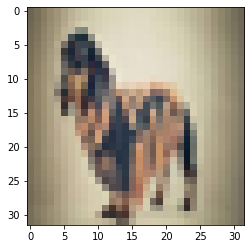

In [ ]:


import requests
# pillow
from PIL import Image
url = input("Enter:")
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((32, 32)).convert("RGB")
img_np = np.array(img).reshape(1, 32, 32, 3) / 255.0
ans = model.predict(img_np).argmax(axis=1)
print("預測:", trans[ans[0]])
plt.imshow(img)

